<a href="https://colab.research.google.com/github/DionisioSC94/tutorials/blob/main/IntroToPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An introduction to Pandas 




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Nueva sección

 **Pandas Basic Objects: Series and DataFrame**
 
 Classes:

```pd.DataFrame``` ```pd.Series```, ```pd.DataFrame.rename```, ```pd.DataFrame.set_index```



In [ ]:
#### Explicit definition of a DataFrame

data = {'apples': [3,4,5,2],
        'oranges':[1,2,3,4],
        }

df = pd.DataFrame(data)
print(df)
print(type(df))

df = df.set_index(pd.Index(['Marius','Salma','Michael','Ruby']))

#df = df.rename(index={'person{}'.format(i):
print(df)


print(type(df['apples']))
print(df.head(10))
#df = df.rename(index=[''])
#### We can rename columns and index 

   apples  oranges
0       3        1
1       4        2
2       5        3
3       2        4
<class 'pandas.core.frame.DataFrame'>
         apples  oranges
Marius        3        1
Salma         4        2
Michael       5        3
Ruby          2        4


KeyError: ignored

**Loading files: csv, json ...**

```pd.read_csv``` ```pd.DataFrame.columns```

In [ ]:
pokemonData = pd.read_csv('./sample_data/pokemon.csv', 
                          sep=',', 
                          header='infer', 
                          names=None, 
                          index_col=None, 
                          usecols=None, 
                          prefix=None, 
                          mangle_dupe_cols=True, 
                          dtype=None, 
                          engine=None, 
                          converters=None, 
                          true_values=None, 
                          false_values=None, 
                          skipinitialspace=False, 
                          skiprows=None, 
                          skipfooter=0, 
                          nrows=None, 
                          na_values=None, 
                          keep_default_na=True, 
                          na_filter=True, 
                          verbose=False, 
                          skip_blank_lines=True, parse_dates=False, 
                          infer_datetime_format=False, 
                          keep_date_col=False, 
                          date_parser=None, 
                          dayfirst=False, 
                          cache_dates=True, 
                          iterator=False, 
                          chunksize=None, 
                          compression='infer', 
                          thousands=None, 
                          decimal='.', 
                          lineterminator=None, 
                          quotechar='"', 
                          quoting=0, 
                          doublequote=True, 
                          escapechar=None, 
                          comment=None, 
                          encoding=None, 
                          dialect=None, 
                          error_bad_lines=True, 
                          warn_bad_lines=True, 
                          delim_whitespace=False, 
                          low_memory=True, 
                          memory_map=False, 
                          float_precision=None)

## Visualize columns
print(pokemonData.columns)

## Visualize a few rowns
print(pokemonData[:10])


Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')
                     abilities  against_bug  ...  generation  is_legendary
0  ['Overgrow', 'Chlorophyll']         1.00  ...           1             0
1  ['Overgrow', 'Chlorophyll']         1.00  ...           1             0
2  ['Overgrow', 'Chlorophyll']         1.00  ...          

# Nueva sección

**Column selection. Boolean selection. Query**

We can select columns from the DataFrame using very simple syntax. 

We can also make a boolean selection of entries (rows) from the data frame using simple commands

We can modify selected data in our DataFrame or Series using different strategies.



*   ```pd.DataFrame[[*list of columns*]]```,
*   ```pd.Series.[max()/min()/argmax()/argmin()/median()...]```
*   ```pd.Series.apply()``` 
*   ```pd.DataFrame.iloc[]```
*   ```pd.DataFrame.loc[]```
* ``` pd.DataFrame.groupby```, ``` pd.DataFrame.groupby().agg()```







 

In [ ]:
#### Column selection. You can select also multiple columns
pokemonData['height_m']

pokemonHandD = pokemonData[['height_m', 'defense']]

### It returns a copy of the Index Object! 
pokemonData['height_m']
print(pokemonData.head(10))
pokemonData['height_m'] + 1 
print(pokemonData)

### Some methods and attributes for the pd.DataFrame and Series object are very analogous to Python 
print('Size is ', pokemonData.size)
print('Shape is ', pokemonData.shape)
print('Mean height is ', pokemonData['height_m'].mean())
print(pokemonData['height_m'])
count = pokemonData['type1'].value_counts()


### Boolean selection
BigPokemon = pokemonData[pokemonData['height_m']>1]
print('The number of big pokemon is {}'.format(len(BigPokemon)))

### Selection with iloc. Similar to numpy array indexing. 
pokemonData.iloc[:,0] = 'No abilities'
print(pokemonData.iloc[:,0])

print(pokemonData.columns)

### Selection based on names. Selection of rows can be boolean 
### change a column especial power to smash for pokemon that are heavy. 
pokemonData['especial_ability']='Nothing'
pokemonData.loc[pokemonData.weight_kg>900, 'especial_ability'] = 'Smash'

print(pokemonData.loc[pokemonData.especial_ability =='Smash',:])


### Grouping with groupby (https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)
print(pokemonData.groupby('type2'))
print(pokemonData.groupby('type2').agg({'weight_kg': 'mean',
                                        'height_m': 'median'
                                        }))


      abilities  against_bug  ...  is_legendary  especial_ability
0  No abilities         1.00  ...             0           Nothing
1  No abilities         1.00  ...             0           Nothing
2  No abilities         1.00  ...             0           Nothing
3  No abilities         0.50  ...             0           Nothing
4  No abilities         0.50  ...             0           Nothing
5  No abilities         0.25  ...             0           Nothing
6  No abilities         1.00  ...             0           Nothing
7  No abilities         1.00  ...             0           Nothing
8  No abilities         1.00  ...             0           Nothing
9  No abilities         1.00  ...             0           Nothing

[10 rows x 42 columns]
        abilities  against_bug  ...  is_legendary  especial_ability
0    No abilities         1.00  ...             0           Nothing
1    No abilities         1.00  ...             0           Nothing
2    No abilities         1.00  ...           

**Some plotting tools**

Plotting are implemented as *methods* on the  ```pd.DataFrame``` or ```pd.Series``` object. 

*   ```pd.DataFrame.plot()```
*   ```pd.Series.plot()```




array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9b6069470>,
      dtype=object)

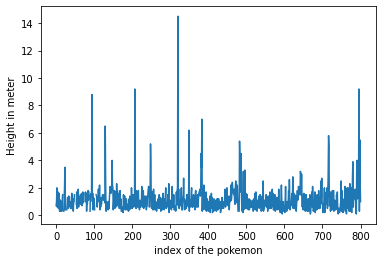

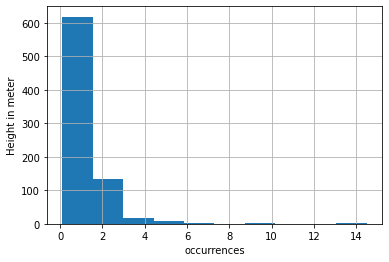

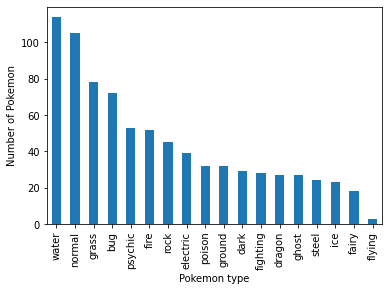

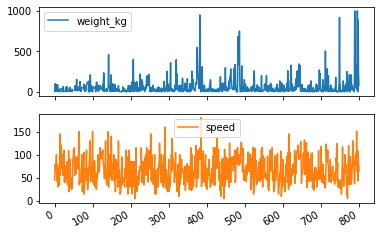

In [ ]:
### Plotting  from series objects
ax = pokemonData['height_m'].plot()
ax.set_xlabel('index of the pokemon')
ax.set_ylabel('Height in meter')

plt.figure()
ax2 = pokemonData['height_m'].hist()
ax2.set_xlabel('occurrences')
ax2.set_ylabel('Height in meter')

plt.figure()
ax3 = count = pokemonData['type1'].value_counts().plot(kind='bar')
ax3.set_xlabel('Pokemon type')
ax3.set_ylabel('Number of Pokemon')

### What happens if we plot an entire pd.DataFrame

pokemonData[['weight_kg','speed']].plot(x=None,
                                        y=None,
                                        kind='line',
                                        ax=None,
                                        subplots=True,
                                        sharex=True,
                                        sharey=False,
                                        layout=None,
                                        figsize=None,
                                        use_index=True,
                                        title=None,
                                        grid=None,
                                        legend=True,
                                        style=None,
                                        logx=False,
                                        logy=False,
                                        loglog=False,
                                        xticks=None,
                                        yticks=None,
                                        xlim=None,
                                        ylim=None,
                                        rot=None,
                                        fontsize=None,
                                        colormap=None,
                                        table=False,
                                        yerr=None,
                                        xerr=None,
                                        secondary_y=False,
                                        sort_columns=False)

***Combining data sets***

*    ```DataFrame.merge()```
*  ```pd.DataFrame.append()```
*   ```pd.DataFrane.join()```






In [ ]:
data_training = pd.read_csv('./sample_data/california_housing_train.csv')
print(data_training.head(10))
print(data_training.columns)
print(data_training.shape)

data_training_expanded = data_training.copy()
data_training_expanded['extra_feature']  = 'Nothing'
data_training_expanded = data_training_expanded.loc[::2, :]
print(data_training_expanded.shape)


data_training_merged = data_training.merge(data_training_expanded,
                how='outer',
                on=['longitude','latitude'],
                left_on=None,
                right_on=None,
                left_index=False,
                right_index=False,
                sort=False,
                suffixes='_x',
                copy=True,
                indicator=False,
                validate=None)

print(data_training.columns)

   longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0
5    -114.58     33.63  ...         3.3438             74000.0
6    -114.58     33.61  ...         2.6768             82400.0
7    -114.59     34.83  ...         1.7083             48500.0
8    -114.59     33.61  ...         2.1782             58400.0
9    -114.60     34.83  ...         2.1908             48100.0

[10 rows x 9 columns]
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
(17000, 9)
(8500, 10)
Index(['longitude', 'latitude', 'housing_median_age_', 'total_rooms_',


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7958: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,
